In [ ]:
column_name = 'binary'
zero_count = (df[column_name] == 0).sum()
one_count = (df[column_name] == 1).sum()

print(f"'{column_name}' 컬럼에서 0의 개수: {zero_count}")
print(f"'{column_name}' 컬럼에서 1의 개수: {one_count}")

'binary' 컬럼에서 0의 개수: 777572
'binary' 컬럼에서 1의 개수: 3222


In [ ]:
file_path2 = 'sliced_data.csv'
df2 = pd.read_csv(file_path2)

column_name = 'binary'
zero_count = (df2[column_name] == 0).sum()
one_count = (df2[column_name] == 1).sum()

print(f"'{column_name}' 컬럼에서 0의 개수: {zero_count}")
print(f"'{column_name}' 컬럼에서 1의 개수: {one_count}")

### 3222개 굿 

'binary' 컬럼에서 0의 개수: 316830
'binary' 컬럼에서 1의 개수: 3222


####  Feature Engineering

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
file_path = 'sliced_data.csv'
df = pd.read_csv(file_path)

In [3]:
# 중심 유한 차분법으로 속도 계산 함수
def calculate_velocity(df, columns):
    velocities = []
    for i in range(2, len(df) - 2):
        x_velocity = (df[columns[0]][i + 2] - df[columns[0]][i - 2]) / 4
        y_velocity = (df[columns[1]][i + 2] - df[columns[1]][i - 2]) / 4
        velocity = (x_velocity, y_velocity)
        velocities.append(velocity)
    
    # 앞뒤로 2개의 데이터는 속도 계산할 수 없으므로 NaN으로 채움
    velocities = [(None, None)] * 2 + velocities + [(None, None)] * 2
    return velocities

# 'L elbow JC' 속도 계산
l_elbow_columns = ["L elbow JC", "L elbow JC.1"]
l_elbow_velocities = calculate_velocity(df, l_elbow_columns)

# 'R elbow JC' 속도 계산
r_elbow_columns = ["R elbow JC", "R elbow JC.1"]
r_elbow_velocities = calculate_velocity(df, r_elbow_columns)

# 속도를 새로운 열에 추가
df["L elbow JC Vel X"] = [v[0] for v in l_elbow_velocities]
df["L elbow JC Vel Y"] = [v[1] for v in l_elbow_velocities]

df["R elbow JC Vel X"] = [v[0] for v in r_elbow_velocities]
df["R elbow JC Vel Y"] = [v[1] for v in r_elbow_velocities]

print(df)


         Frame  Head center  Head center.1  Head center.2  L ankle JC  \
0         1508     0.000752       0.006901       1.635404   -0.205349   
1         1509     0.000752       0.006901       1.635404   -0.205349   
2         1510     0.000752       0.006901       1.635404   -0.205349   
3         1511     0.000752       0.006901       1.635404   -0.205349   
4         1512     0.000752       0.006901       1.635404   -0.205349   
...        ...          ...            ...            ...         ...   
320047  780566    -0.524461       0.811930       1.553821   -0.701474   
320048  780567    -0.529789       0.817145       1.554056   -0.701088   
320049  780568    -0.534571       0.822368       1.553959   -0.700644   
320050  780569    -0.538749       0.827536       1.553718   -0.700260   
320051  780570    -0.542381       0.832630       1.553472   -0.700019   

        L ankle JC.1  L ankle JC.2  L elbow JC  L elbow JC.1  L elbow JC.2  \
0           0.003352      0.065636   -0.45591

In [4]:
# 유클리디안 거리 계산 함수
def euclidean_distance(row, col1, col2):
    coord1 = np.array(row[col1])
    coord2 = np.array(row[col2])
    distance = np.sqrt(np.sum((coord1 - coord2) ** 2))
    return distance

# 'L ankle JC'와 'R ankle JC' 사이의 거리 계산
df['Distance L-R ankle JC X'] = df.apply(lambda row: euclidean_distance(row, 'L ankle JC', 'R ankle JC'), axis=1)

# 'L ankle JC 1'와 'R ankle JC 1' 사이의 거리 계산
df['Distance L-R ankle JC Y'] = df.apply(lambda row: euclidean_distance(row, 'L ankle JC.1', 'R ankle JC.1'), axis=1)

# 최종 데이터프레임 출력
print("원본 데이터프레임에 유클리디안 거리 추가:")
print(df)

원본 데이터프레임에 유클리디안 거리 추가:
         Frame  Head center  Head center.1  Head center.2  L ankle JC  \
0         1508     0.000752       0.006901       1.635404   -0.205349   
1         1509     0.000752       0.006901       1.635404   -0.205349   
2         1510     0.000752       0.006901       1.635404   -0.205349   
3         1511     0.000752       0.006901       1.635404   -0.205349   
4         1512     0.000752       0.006901       1.635404   -0.205349   
...        ...          ...            ...            ...         ...   
320047  780566    -0.524461       0.811930       1.553821   -0.701474   
320048  780567    -0.529789       0.817145       1.554056   -0.701088   
320049  780568    -0.534571       0.822368       1.553959   -0.700644   
320050  780569    -0.538749       0.827536       1.553718   -0.700260   
320051  780570    -0.542381       0.832630       1.553472   -0.700019   

        L ankle JC.1  L ankle JC.2  L elbow JC  L elbow JC.1  L elbow JC.2  \
0           0.003352 

In [2]:
df.to_csv('vel_dis_data.csv', index=False)

NameError: name 'df' is not defined

In [6]:
file_path = 'vel_dis_data.csv'
df = pd.read_csv(file_path)

# 삭제할 열을 제외한 나머지 열을 선택
columns_to_keep = ['R elbow JC Vel X', 'R elbow JC Vel Y', 'L elbow JC Vel X', 'L elbow JC Vel Y','Distance L-R ankle JC X', 'Distance L-R ankle JC Y', 'binary']
df = df[['R elbow JC Vel X', 'R elbow JC Vel Y', 'L elbow JC Vel X', 'L elbow JC Vel Y', 'Distance L-R ankle JC X', 'Distance L-R ankle JC Y', 'binary']]

# 열 이름을 변경
df.columns = columns_to_keep

# 인덱스 리셋 (기본 0부터 시작)
df.reset_index(drop=True, inplace=True)

print(df)

        R elbow JC Vel X  R elbow JC Vel Y  L elbow JC Vel X  \
0                    NaN               NaN               NaN   
1                    NaN               NaN               NaN   
2               0.000000          0.000000          0.000000   
3               0.000000          0.000000          0.000000   
4               0.000000          0.000000          0.000000   
...                  ...               ...               ...   
320047         -0.010508          0.008256         -0.005655   
320048         -0.008771          0.003508         -0.005478   
320049         -0.006850          0.000073         -0.005128   
320050               NaN               NaN               NaN   
320051               NaN               NaN               NaN   

        L elbow JC Vel Y  Distance L-R ankle JC X  Distance L-R ankle JC Y  \
0                    NaN                 0.410698                 0.000000   
1                    NaN                 0.410698                 0.000000 

In [9]:
# 결측치가 있는 행 삭제
df.dropna(axis=0, how='any', inplace=True)

# 열 이름을 변경
df.columns = ['R elbow JC Vel X', 'R elbow JC Vel Y', 'L elbow JC Vel X', 'L elbow JC Vel Y', 'Distance L-R ankle JC X', 'Distance L-R ankle JC Y', 'binary']

# 인덱스 리셋 (기본 0부터 시작)
df.reset_index(drop=True, inplace=True)

print(df)

        R elbow JC Vel X  R elbow JC Vel Y  L elbow JC Vel X  \
0               0.000000          0.000000          0.000000   
1               0.000000          0.000000          0.000000   
2               0.000000          0.000000          0.000000   
3               0.000000          0.000000          0.000000   
4               0.000000          0.000000          0.000000   
...                  ...               ...               ...   
320043         -0.012340          0.016669         -0.005540   
320044         -0.011771          0.013092         -0.005660   
320045         -0.010508          0.008256         -0.005655   
320046         -0.008771          0.003508         -0.005478   
320047         -0.006850          0.000073         -0.005128   

        L elbow JC Vel Y  Distance L-R ankle JC X  Distance L-R ankle JC Y  \
0               0.000000                 0.410698                 0.000000   
1               0.000000                 0.410698                 0.000000 

In [10]:
df.to_csv('vel_dis_data.csv', index=False)

속도 데이터 확인

In [5]:
file = 'vel_dis_data.csv'
df = pd.read_csv(file)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320048 entries, 0 to 320047
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   R elbow JC Vel X         320048 non-null  float64
 1   R elbow JC Vel Y         320048 non-null  float64
 2   L elbow JC Vel X         320048 non-null  float64
 3   L elbow JC Vel Y         320048 non-null  float64
 4   Distance L-R ankle JC X  320048 non-null  float64
 5   Distance L-R ankle JC Y  320048 non-null  float64
 6   binary                   320048 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 17.1 MB


In [15]:
print(df.shape)

(320048, 7)


In [10]:
df.head(20)

,R elbow JC Vel X,R elbow JC Vel Y,L elbow JC Vel X,L elbow JC Vel Y,Distance L-R ankle JC X,Distance L-R ankle JC Y,binary
0,0.0,0.0,0.0,0.0,0.410698,0.0,0
1,0.0,0.0,0.0,0.0,0.410698,0.0,0
2,0.0,0.0,0.0,0.0,0.410698,0.0,0
3,0.0,0.0,0.0,0.0,0.410698,0.0,0
4,0.0,0.0,0.0,0.0,0.410698,0.0,0
5,0.0,0.0,0.0,0.0,0.410698,0.0,0
6,0.0,0.0,0.0,0.0,0.410698,0.0,0
7,0.0,0.0,0.0,0.0,0.410698,0.0,0
8,0.0,0.0,0.0,0.0,0.410698,0.0,0
9,0.0,0.0,0.0,0.0,0.410698,0.0,0


/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


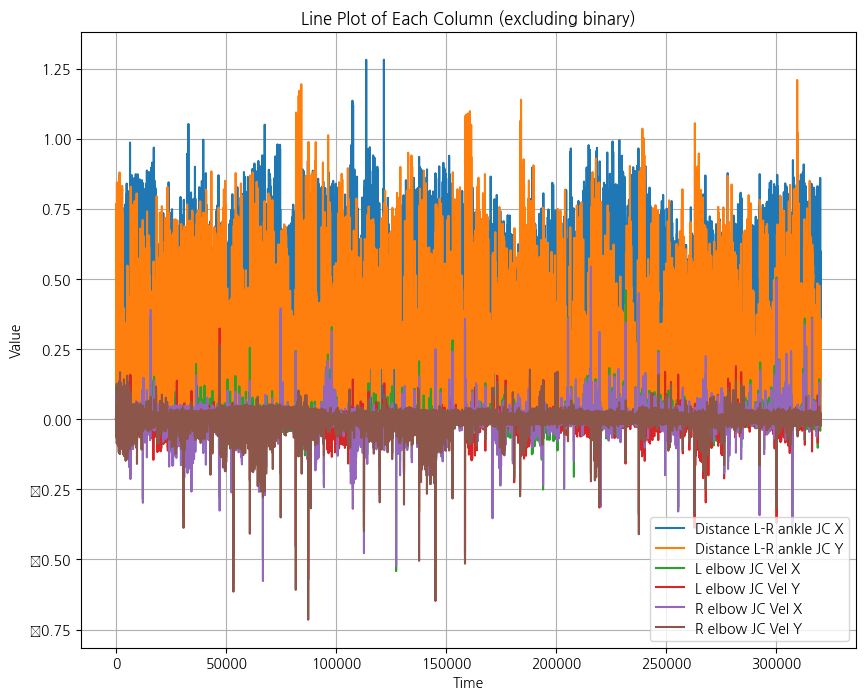

In [12]:
# 'binary' 열을 제외한 나머지 열을 선택
columns_to_plot = df.columns.difference(['binary'])

# 시간 축 (인덱스)를 생성
time = range(len(df))

# 꺾은 선 그래프 그리기
plt.figure(figsize=(10, 8))

# 각 열에 대해 그래프를 그림
for column in columns_to_plot:
    plt.plot(time, df[column], label=column)

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Line Plot of Each Column (excluding binary)')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
# 특정 컬럼들의 값이 모두 0인 행을 삭제
columns_to_check = ['R elbow JC Vel X', 'R elbow JC Vel Y', 'L elbow JC Vel X', 'L elbow JC Vel Y']
df = df[~(df[columns_to_check] == 0).all(axis=1)]

# 결과 확인
print(df)

        R elbow JC Vel X  R elbow JC Vel Y  L elbow JC Vel X  \
48          2.500000e-07          0.000000      0.000000e+00   
49          2.500000e-07          0.000000      0.000000e+00   
52         -2.500000e-07          0.000000     -2.500000e-07   
53         -2.500000e-07          0.000000     -2.500000e-07   
57          2.500000e-07          0.000000      0.000000e+00   
...                  ...               ...               ...   
320043     -1.234025e-02          0.016669     -5.539500e-03   
320044     -1.177075e-02          0.013092     -5.660000e-03   
320045     -1.050800e-02          0.008256     -5.655000e-03   
320046     -8.771500e-03          0.003508     -5.478250e-03   
320047     -6.850250e-03          0.000073     -5.128000e-03   

        L elbow JC Vel Y  Distance L-R ankle JC X  Distance L-R ankle JC Y  \
48              0.000000                 0.410698                 0.000000   
49              0.000000                 0.410698                 0.000000 

In [30]:
df.head()

,R elbow JC Vel Y,L elbow JC Vel X,L elbow JC Vel Y,Distance L-R ankle JC X,Distance L-R ankle JC Y,binary
48,0.0,0.000000e+00,0.0,0.410698,0.0,0
49,0.0,0.000000e+00,0.0,0.410698,0.0,0
52,0.0,-2.500000e-07,0.0,0.410698,0.0,0
53,0.0,-2.500000e-07,0.0,0.410698,0.0,0
57,0.0,0.000000e+00,0.0,0.410698,0.0,0


DL - LSTM 

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

In [29]:
# 특성과 라벨 분리
# df = df.drop(df.columns[0], axis=1)
X = df.drop(columns=['binary']).values
y = df['binary'].values

# 데이터 전처리
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
# 시계열 데이터 변환 및 텐서 변환 
# LSTM의 입력은 3D 텐서니까: [samples, time steps, features]
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# 데이터를 텐서로 변환
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)


In [20]:
# DataLoader 생성
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [21]:
# 모델 정의
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(LSTMClassifier, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), hidden_size).to(x.device)
        c0 = torch.zeros(1, x.size(0), hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# input_size는 특성(feature)의 수 -> 제거해서 넣기 추가로 돌려볼 것
input_size = X_train.shape[2]
hidden_size = 50
num_classes = 2

model = LSTMClassifier(input_size, hidden_size, num_classes)

# 모델 훈련 설정
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


# 조기 종료 설정
patience = 3
best_loss = np.inf
counter = 0

In [22]:
print(f'Shape of X_train: {X_train.shape}')

Shape of X_train: torch.Size([255925, 1, 6])


In [23]:
# 모델 학습
num_epochs = 20
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)
    
    # Validation loss
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    
    val_loss /= len(test_loader)
    val_losses.append(val_loss)
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')
    
    # Early Stopping
    if val_loss < best_loss:
        best_loss = val_loss
        counter = 0
        torch.save(model.state_dict(), 'best_model.pth')
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping")
            break

Epoch [1/20], Train Loss: 0.0427, Validation Loss: 0.0317
Epoch [2/20], Train Loss: 0.0306, Validation Loss: 0.0300
Epoch [3/20], Train Loss: 0.0291, Validation Loss: 0.0286
Epoch [4/20], Train Loss: 0.0281, Validation Loss: 0.0281
Epoch [5/20], Train Loss: 0.0273, Validation Loss: 0.0284
Epoch [6/20], Train Loss: 0.0267, Validation Loss: 0.0275
Epoch [7/20], Train Loss: 0.0263, Validation Loss: 0.0265
Epoch [8/20], Train Loss: 0.0260, Validation Loss: 0.0259
Epoch [9/20], Train Loss: 0.0258, Validation Loss: 0.0256
Epoch [10/20], Train Loss: 0.0255, Validation Loss: 0.0258
Epoch [11/20], Train Loss: 0.0253, Validation Loss: 0.0262
Epoch [12/20], Train Loss: 0.0252, Validation Loss: 0.0255
Epoch [13/20], Train Loss: 0.0250, Validation Loss: 0.0257
Epoch [14/20], Train Loss: 0.0249, Validation Loss: 0.0252
Epoch [15/20], Train Loss: 0.0246, Validation Loss: 0.0250
Epoch [16/20], Train Loss: 0.0245, Validation Loss: 0.0249
Epoch [17/20], Train Loss: 0.0244, Validation Loss: 0.0246
Epoch 

In [24]:
# 모델 평가
model.load_state_dict(torch.load('best_model.pth'))
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Test Accuracy: {100 * correct / total:.2f}%')

Test Accuracy: 99.04%


In [25]:
# 혼동 행렬 & 분류 보고서
from sklearn.metrics import confusion_matrix, classification_report

# 'y_test' 를 cpu로 옮겨서 numpy 배열로 변환
y_test_np = y_test.cpu().numpy()
# 예측된 레이블 저장할 빈 리스트 초기화
y_pred_np = []

# gd 계산 비활 -> 메모리 낮추고 연산 속도 높임(예측 단계에서만 사용함)
with torch.no_grad():
    # 테스트 데이터 로더에서 배치 단위로 데이터를 가져옴, 여기서는 사용x
    for inputs, _ in test_loader:
        # 인풋데이터를 모델이 있는 장치로 이동시킴 
        inputs = inputs.to(device)
        # 모델을 통해 입력데이터 예측하여 출력값 얻음 
        outputs = model(inputs)
        # output에서 최댓값 인덱스 가져와서 예측된 클래스 레이블 얻음 
        _, predicted = torch.max(outputs.data, 1)
        # 예측된 레이블 cpu로 옮기고 넘파이 배열로 변환하여 리스트에 추가 
        y_pred_np.extend(predicted.cpu().numpy())

print(confusion_matrix(y_test_np, y_pred_np))
print(classification_report(y_test_np, y_pred_np))

[[63265    96]
 [  517   104]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     63361
           1       0.52      0.17      0.25       621

    accuracy                           0.99     63982
   macro avg       0.76      0.58      0.62     63982
weighted avg       0.99      0.99      0.99     63982



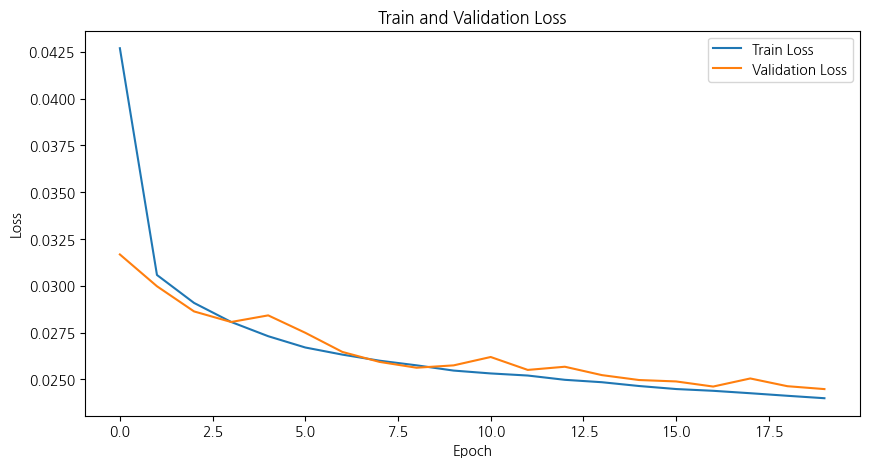

In [26]:
# 학습 및 검증 손실 시각화
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Train and Validation Loss')
plt.show()

In [32]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/5b/c2/ffab644d6dabb5903a3754bac87a76f3c99828ebe62261975f53472d3035/xgboost-2.1.0-py3-none-manylinux_2_28_x86_64.whl.metadata
  Obtaining dependency information for nvidia-nccl-cu12 from https://files.pythonhosted.org/packages/72/3a/1ff98da19ad6d54db45e5b2a1e3fb77bd19e54b75cdb20d89f8161384dbb/nvidia_nccl_cu12-2.22.3-py3-none-manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 15.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 23.4 MB/s eta 0:00:0000:0100:01


In [33]:
!pip install lightgbm

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/f2/3d/4f152cf694aec100ab63b4a5547f2dbfbea59ab39d9375c89bed9775e47d/lightgbm-4.4.0-py3-none-manylinux_2_28_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 7.3 MB/s eta 0:00:00a 0:00:01


In [36]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_squared_error

# 데이터 준비
X = df.drop('binary', axis=1)
y = df['binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 리스트
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net': ElasticNet(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror'),
    'LightGBM': lgb.LGBMRegressor(),
    'CatBoost': CatBoostRegressor(verbose=0),
    'SVR': SVR(),
}

# 각 모델에 대한 평가 척도 저장할 딕셔너리
evaluation_scores = {}

for model_name, model in models.items():
    # 모델 피팅
    model.fit(X_train, y_train)
    # 예측값 계산
    y_pred = model.predict(X_test)
    # R2 계산
    r2 = r2_score(y_test, y_pred)
    # RMSE 계산
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    # 결과 저장
    evaluation_scores[model_name] = {'R2': r2, 'RMSE': rmse}

# 결과 출력
for model_name, scores in evaluation_scores.items():
    print(f"{model_name}: R2 = {scores['R2']}, RMSE = {scores['RMSE']}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000511 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 255925, number of used features: 5
[LightGBM] [Info] Start training from score 0.010163
Linear Regression: R2 = 0.014235916711274221, RMSE = 0.09733868958183295
Ridge Regression: R2 = 0.014285428633645347, RMSE = 0.09733624503843673
Lasso Regression: R2 = -2.1755267947121126e-05, RMSE = 0.09804009515933959
Elastic Net: R2 = -2.1755267947121126e-05, RMSE = 0.09804009515933959
Random Forest: R2 = 0.2837801976410963, RMSE = 0.08297020483545847
Gradient Boosting: R2 = 0.1390045275158106, RMSE = 0.09097025957633331
XGBoost: R2 = 0.20426782309431124, RMSE = 0.08745456018454335
LightGBM: R2 = 0.2167007